# Notebook 기본 세팅

In [1]:
# Constant 선언

# 프로젝트 루트 디렉토리를 식별하기 위한 마커 파일 이름
ROOT_MARKER = "pyproject.toml"

# 한글 표시를 위한 나눔바른고딕 폰트 파일 이름
# matplotlib 의 font_manager 에 실제 폰트 파일의 위치를 넣어주어야 한다.
KOREAN_FONT_FILE = "NanumBarunGothic.ttf"

# matplotlib 에서는 font-family 의 이름으로 font 를 설정한다.
# 그래서 font 파일 그 자체가 아니라, 그 파일의 family 이름을 적어준다.
KOREAN_FONT_FAMILY = "NanumBarunGothic"

# 참고
# Font Family 와 Font File 의 차이는,
# Font Family 는 비슷한 디자인 특성을 공유하는 글꼴 그룹을 의미한다.
#
# 예를 들어 '나눔바른고딕' 폰트 패밀리는 일반(Regular), 굵게(Bold), 기울임(Italic) 등 여러 스타일을 포함할 수 있다.
# 반면, 폰트 파일(.ttf, .otf 등)은 이러한 폰트의 하나의 스타일이 저장된 실제 파일이다.
#
# 이 프로젝트에서는 폰트 용량을 줄이기 위해 일반(Regular) 인 NanumBarunGothic.ttf 만 사용한다.

In [2]:
# 프로젝트 root 를 sys.path 에 추가해서 import 구문을 사용하기 쉽게
from pathlib import Path


def find_project_root() -> Path:
    """
    pyproject.toml 파일을 기준으로 루트 디렉토리를 찾는다.
    :return: Path: 프로젝트 루트 디렉토리 경로
    """

    current_path = Path().resolve()

    while current_path != current_path.parent:
        if (current_path / ROOT_MARKER).exists():
            return current_path

        current_path = current_path.parent

    raise FileNotFoundError("프로젝트 루트 디렉토리를 찾을 수 없습니다.")


ROOT_DIR = find_project_root()

## 특정 피처들만 추출 후 csv 파일로 저장

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager


KOREAN_FONT_FILE = "/opt/project/notebooks/fonts/NanumBarunGothic.ttf" 
KOREAN_FONT_FAMILY = "NanumBarunGothic"

# 폰트 파일 존재 확인

plt.rcParams['font.family'] = KOREAN_FONT_FAMILY
plt.rcParams['axes.unicode_minus'] = False

In [4]:
file_path= "/opt/project/src/data/weather_96stations_5years.csv"

df = pd.read_csv(file_path, encoding= 'utf-8')

In [5]:
all_weather_features = ['stnNm', 'tm', 'avgTa', 'minTa', 'maxTa', 'avgTs', 'avgPs', 'sumRn', 'hr1MaxRn', 'avgRhm', 'avgPv', 'avgWs', 'ddMefs', 'ddMes', 'avgTca', 'sumSsHr', 'avgLmac']
# 데이터프레임에 존재하는 피쳐만 필터링
existing_features = [col for col in all_weather_features if col in df.columns]
missing_features = [col for col in all_weather_features if col not in df.columns]

print(f"요청한 피쳐 수: {len(all_weather_features)}")
print(f"존재하는 피쳐 수: {len(existing_features)}")
print(f"존재하는 피쳐: {existing_features}")

if missing_features:
    print(f"누락된 피쳐: {missing_features}")

if existing_features:
    # 선택된 피쳐만으로 새 데이터프레임 생성
    weather_df = df[existing_features].copy()
    
    print(f"\n추출된 데이터 형태: {weather_df.shape}")
    print("추출된 데이터 미리보기:")
    print(weather_df.head())
    
    # CSV 파일로 저장
    output_filename = "weather_5years_features_17.csv"
    weather_df.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"\nCSV 파일 저장 완료: {output_filename}")

요청한 피쳐 수: 17
존재하는 피쳐 수: 17
존재하는 피쳐: ['stnNm', 'tm', 'avgTa', 'minTa', 'maxTa', 'avgTs', 'avgPs', 'sumRn', 'hr1MaxRn', 'avgRhm', 'avgPv', 'avgWs', 'ddMefs', 'ddMes', 'avgTca', 'sumSsHr', 'avgLmac']

추출된 데이터 형태: (169164, 17)
추출된 데이터 미리보기:
  stnNm          tm  avgTa  minTa  maxTa  avgTs   avgPs  sumRn  hr1MaxRn  \
0    속초  2020-01-01    0.8   -3.4    4.8   -0.2  1026.7    NaN       NaN   
1    속초  2020-01-02    2.8   -2.1    6.6    0.7  1025.2    NaN       NaN   
2    속초  2020-01-03    4.7    0.8    8.5    2.0  1021.9    NaN       NaN   
3    속초  2020-01-04    4.0    1.1    8.1    1.8  1022.4    NaN       NaN   
4    속초  2020-01-05    3.1   -0.6    8.8    2.0  1029.5    NaN       NaN   

   avgRhm  avgPv  avgWs  ddMefs  ddMes  avgTca  sumSsHr  avgLmac  
0    36.1    2.3    2.4     NaN    NaN     0.3      8.9      0.0  
1    38.6    2.9    2.3     NaN    NaN     0.4      8.8      0.0  
2    28.9    2.4    2.2     NaN    NaN     0.0      8.8      NaN  
3    30.1    2.4    2.2     NaN    NaN

## 17개 피처들로만 eda 진행
* CSV 파일명: weather_5years_features_15.csv
* 각 예측별 필요 피쳐 종류
    - temperature_features = ['avgTa', 'minTa', 'maxTa', 'avgTs']
    - precipitation_features = ['avgPs', 'sumRn', 'hr1MaxRn', 'avgRhm', 'avgPv', 'avgWs']
    - snow_features = ['ddMefs', 'ddMes', 'avgTa', 'avgRhm']
    - cloudiness_features = ['avgTca', 'sumSsHr', 'avgLmac', 'avgPs']

    - basic_info = ['stnNm', 'tm']

    - all_weather_features = ['avgTa', 'minTa', 'maxTa', 'avgTs', 'avgPs', 'sumRn', 'hr1MaxRn', 'avgRhm', 'avgPv', 'avgWs', 'ddMefs', 'ddMes', 'avgTca', 'sumSsHr', 'avgLmac']

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager


KOREAN_FONT_FILE = "/opt/project/notebooks/fonts/NanumBarunGothic.ttf" 
KOREAN_FONT_FAMILY = "NanumBarunGothic"

font_manager.fontManager.addfont(KOREAN_FONT_FILE)

plt.rcParams['font.family'] = KOREAN_FONT_FAMILY
plt.rcParams['axes.unicode_minus'] = False

In [7]:
file_path= "/opt/project/src/data/weather_5years_features_17.csv"

df = pd.read_csv(file_path, encoding= 'utf-8')

In [8]:
df.shape

(169164, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169164 entries, 0 to 169163
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stnNm     169164 non-null  object 
 1   tm        169164 non-null  object 
 2   avgTa     168940 non-null  float64
 3   minTa     169070 non-null  float64
 4   maxTa     169073 non-null  float64
 5   avgTs     168855 non-null  float64
 6   avgPs     168916 non-null  float64
 7   sumRn     65473 non-null   float64
 8   hr1MaxRn  42557 non-null   float64
 9   avgRhm    168878 non-null  float64
 10  avgPv     168858 non-null  float64
 11  avgWs     168863 non-null  float64
 12  ddMefs    1138 non-null    float64
 13  ddMes     1795 non-null    float64
 14  avgTca    167652 non-null  float64
 15  sumSsHr   168459 non-null  float64
 16  avgLmac   163851 non-null  float64
dtypes: float64(15), object(2)
memory usage: 21.9+ MB


In [10]:
df.describe

<bound method NDFrame.describe of        stnNm          tm  avgTa  minTa  maxTa  avgTs   avgPs  sumRn  hr1MaxRn  \
0         속초  2020-01-01    0.8   -3.4    4.8   -0.2  1026.7    NaN       NaN   
1         속초  2020-01-02    2.8   -2.1    6.6    0.7  1025.2    NaN       NaN   
2         속초  2020-01-03    4.7    0.8    8.5    2.0  1021.9    NaN       NaN   
3         속초  2020-01-04    4.0    1.1    8.1    1.8  1022.4    NaN       NaN   
4         속초  2020-01-05    3.1   -0.6    8.8    2.0  1029.5    NaN       NaN   
...      ...         ...    ...    ...    ...    ...     ...    ...       ...   
169159    남해  2024-12-27    3.4    0.4    6.3    2.8  1024.9    NaN       NaN   
169160    남해  2024-12-28    2.2    0.1    4.2    2.3  1023.9    NaN       NaN   
169161    남해  2024-12-29    4.5    1.4    9.4    3.5  1026.0    NaN       NaN   
169162    남해  2024-12-30    6.7    0.2   12.3    4.7  1020.9    NaN       NaN   
169163    남해  2024-12-31    5.5   -0.4    9.6    4.0  1019.3    NaN       N

In [11]:
df.head()

,stnNm,tm,avgTa,minTa,maxTa,avgTs,avgPs,sumRn,hr1MaxRn,avgRhm,avgPv,avgWs,ddMefs,ddMes,avgTca,sumSsHr,avgLmac
0,속초,2020-01-01,0.8,-3.4,4.8,-0.2,1026.7,NaN,NaN,36.1,2.3,2.4,NaN,NaN,0.3,8.9,0.0
1,속초,2020-01-02,2.8,-2.1,6.6,0.7,1025.2,NaN,NaN,38.6,2.9,2.3,NaN,NaN,0.4,8.8,0.0
2,속초,2020-01-03,4.7,0.8,8.5,2.0,1021.9,NaN,NaN,28.9,2.4,2.2,NaN,NaN,0.0,8.8,NaN
3,속초,2020-01-04,4.0,1.1,8.1,1.8,1022.4,NaN,NaN,30.1,2.4,2.2,NaN,NaN,0.0,8.9,0.0
4,속초,2020-01-05,3.1,-0.6,8.8,2.0,1029.5,NaN,NaN,43.3,3.3,1.4,NaN,NaN,1.3,8.4,0.6


In [12]:
df.tail()

,stnNm,tm,avgTa,minTa,maxTa,avgTs,avgPs,sumRn,hr1MaxRn,avgRhm,avgPv,avgWs,ddMefs,ddMes,avgTca,sumSsHr,avgLmac
169159,남해,2024-12-27,3.4,0.4,6.3,2.8,1024.9,NaN,NaN,51.4,4.0,2.5,NaN,NaN,2.4,8.0,1.1
169160,남해,2024-12-28,2.2,0.1,4.2,2.3,1023.9,NaN,NaN,57.0,4.1,3.2,NaN,NaN,4.4,7.5,1.9
169161,남해,2024-12-29,4.5,1.4,9.4,3.5,1026.0,NaN,NaN,57.1,4.7,2.1,NaN,NaN,3.4,7.6,0.8
169162,남해,2024-12-30,6.7,0.2,12.3,4.7,1020.9,NaN,NaN,66.3,6.3,1.4,NaN,NaN,6.6,6.4,1.9
169163,남해,2024-12-31,5.5,-0.4,9.6,4.0,1019.3,NaN,NaN,43.3,3.9,1.7,NaN,NaN,0.0,8.0,0.0


In [13]:
df.columns

Index(['stnNm', 'tm', 'avgTa', 'minTa', 'maxTa', 'avgTs', 'avgPs', 'sumRn',
       'hr1MaxRn', 'avgRhm', 'avgPv', 'avgWs', 'ddMefs', 'ddMes', 'avgTca',
       'sumSsHr', 'avgLmac'],
      dtype='object')

In [14]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) *100

missing_df = pd.DataFrame({
    '결측치 개수': missing_count,
    '결측치 비율(%)' : missing_percent
})

print(missing_df)

          결측치 개수  결측치 비율(%)
stnNm          0   0.000000
tm             0   0.000000
avgTa        224   0.132416
minTa         94   0.055567
maxTa         91   0.053794
avgTs        309   0.182663
avgPs        248   0.146603
sumRn     103691  61.296139
hr1MaxRn  126607  74.842756
avgRhm       286   0.169067
avgPv        306   0.180890
avgWs        301   0.177934
ddMefs    168026  99.327280
ddMes     167369  98.938900
avgTca      1512   0.893807
sumSsHr      705   0.416755
avgLmac     5313   3.140739


In [15]:
#결측치가 있는 변수들 나열
missing_exist_df = missing_df[missing_df['결측치 개수'] > 0].sort_values('결측치 비율(%)', ascending=False)

print(missing_exist_df)

          결측치 개수  결측치 비율(%)
ddMefs    168026  99.327280
ddMes     167369  98.938900
hr1MaxRn  126607  74.842756
sumRn     103691  61.296139
avgLmac     5313   3.140739
avgTca      1512   0.893807
sumSsHr      705   0.416755
avgTs        309   0.182663
avgPv        306   0.180890
avgWs        301   0.177934
avgRhm       286   0.169067
avgPs        248   0.146603
avgTa        224   0.132416
minTa         94   0.055567
maxTa         91   0.053794


## 수치형 분석

In [16]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols)>0:
    print(f"수치형 변수: {numerical_cols}\n")
    print(f"기술 통계량:\n {df[numerical_cols].describe()}")

수치형 변수: ['avgTa', 'minTa', 'maxTa', 'avgTs', 'avgPs', 'sumRn', 'hr1MaxRn', 'avgRhm', 'avgPv', 'avgWs', 'ddMefs', 'ddMes', 'avgTca', 'sumSsHr', 'avgLmac']

기술 통계량:
                avgTa          minTa          maxTa          avgTs  \
count  168940.000000  169070.000000  169073.000000  168855.000000   
mean       13.733122       9.085745      19.104541      15.878734   
std         9.618708      10.313592       9.511317      10.656642   
min       -19.700000     -25.200000     -15.200000     -12.600000   
25%         6.000000       0.700000      11.500000       6.300000   
50%        14.400000       9.100000      20.300000      16.500000   
75%        22.100000      18.300000      26.900000      25.100000   
max        33.400000      30.600000      39.300000      42.900000   

               avgPs         sumRn      hr1MaxRn         avgRhm  \
count  168916.000000  65473.000000  42557.000000  168878.000000   
mean     1016.398516     10.159235      5.158021      70.454102   
std         8

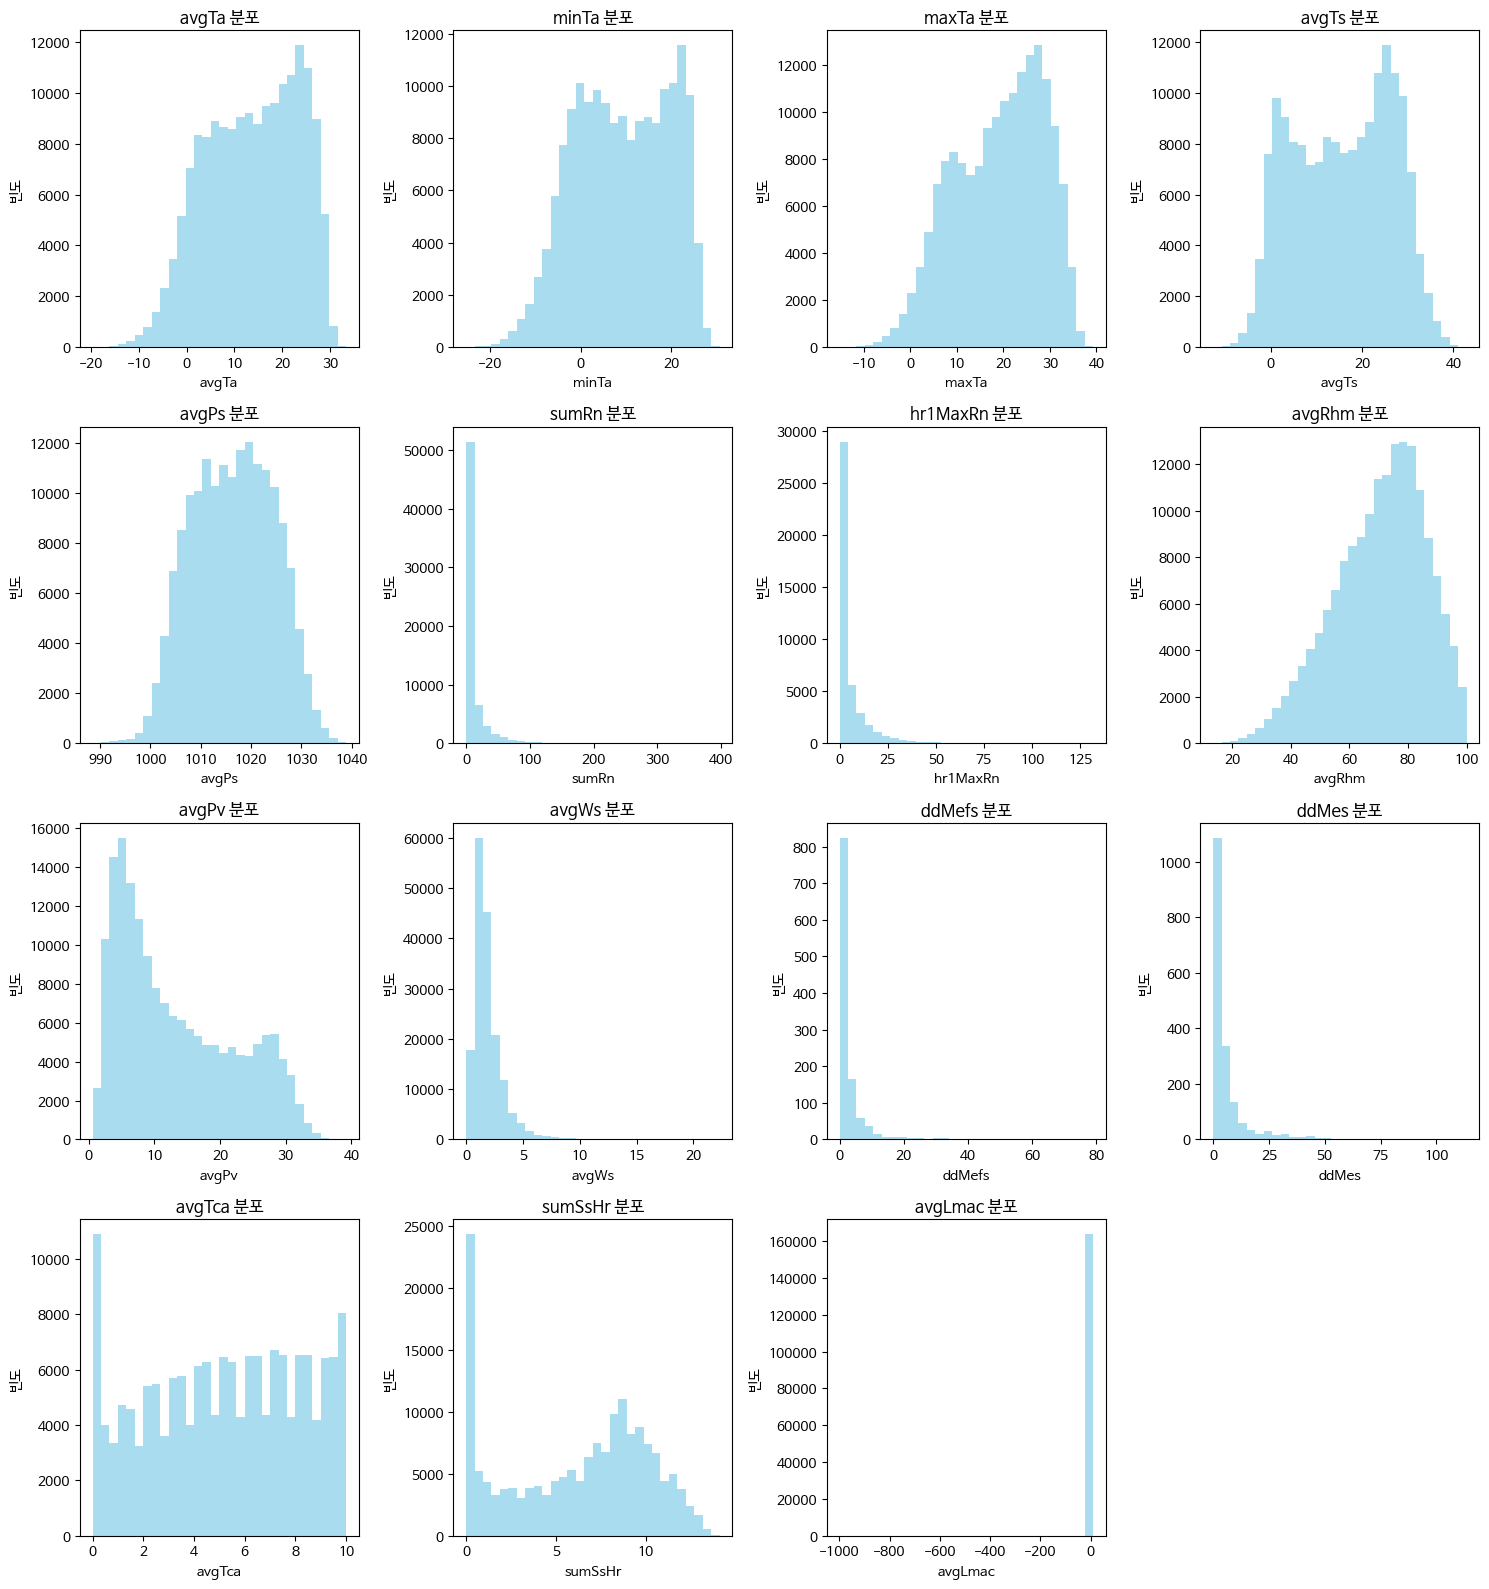

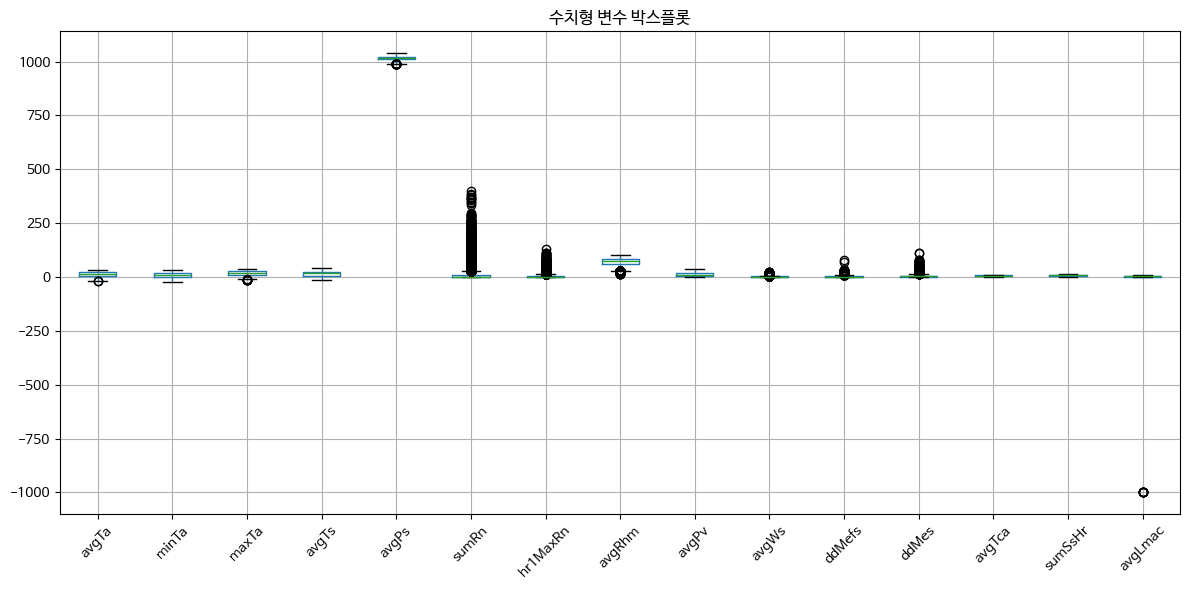

In [17]:
# 히스토그램
n_cols = min(4, len(numerical_cols))
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if n_rows == 1 and n_cols == 1:
        ax = axes[0]
    else:
        ax = axes[i]
    ax.hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue')
    ax.set_title(f'{col} 분포')
    ax.set_xlabel(col)
    ax.set_ylabel('빈도')

# 빈 subplot 제거
if n_rows > 1 or n_cols > 1:
    for i in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 박스플롯
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 6))
    df[numerical_cols].boxplot(rot=45)
    plt.title('수치형 변수 박스플롯')
    plt.tight_layout()
    plt.show()
elif len(numerical_cols) == 1:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[numerical_cols[0]].dropna())
    plt.title(f'{numerical_cols[0]} 박스플롯')
    plt.ylabel(numerical_cols[0])
    plt.show()

* avgLmac → 매우 작은 음수 방향으로 극단적 이상치 존재 (하단에 큰 점 분포 있음)

* ddMefs, ddMes, sumRn, hr1MaxRn → 수많은 이상치들이 위쪽으로 솟아 있음

→ 이 변수들은 스케일이 크고 분포가 치우쳐 있음 → 정규화 필요 가능성 있음

* 중앙값과 평균 위치 차이 (비대칭 분포의 가능성)
    sumRn, hr1MaxRn → 박스가 매우 아래쪽에 몰려 있고 위로 뻗은 이상치가 많음 → 우측으로 긴 분포 (positive skew)

* 상대적으로 스케일이 큰 변수
    avgPs는 약 1000 이상 단위, ddMefs, ddMes도 눈 측정 단위라 크기가 큼
    → 모델링 전 스케일 표준화 필요 (StandardScaler, MinMaxScaler 등)



## 범주형 변수 분석

In [18]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(categorical_cols)>0:
    print(f"범주형 변수: {categorical_cols}")

범주형 변수: ['stnNm', 'tm']


In [19]:
for col in categorical_cols:
    print("{col}변수:")
    value_counts = df[col].value_counts()
    print(value_counts)

{col}변수:
stnNm
속초     1827
양평     1827
순창군    1827
김해시    1827
고창군    1827
       ... 
성산     1461
제주     1461
완도     1461
영천     1461
고창     1460
Name: count, Length: 95, dtype: int64
{col}변수:
tm
2022-07-02    95
2023-04-12    95
2023-05-08    95
2023-05-07    95
2023-05-06    95
              ..
2020-09-03    84
2020-09-04    84
2020-09-05    84
2020-09-06    84
2020-01-01    84
Name: count, Length: 1827, dtype: int64


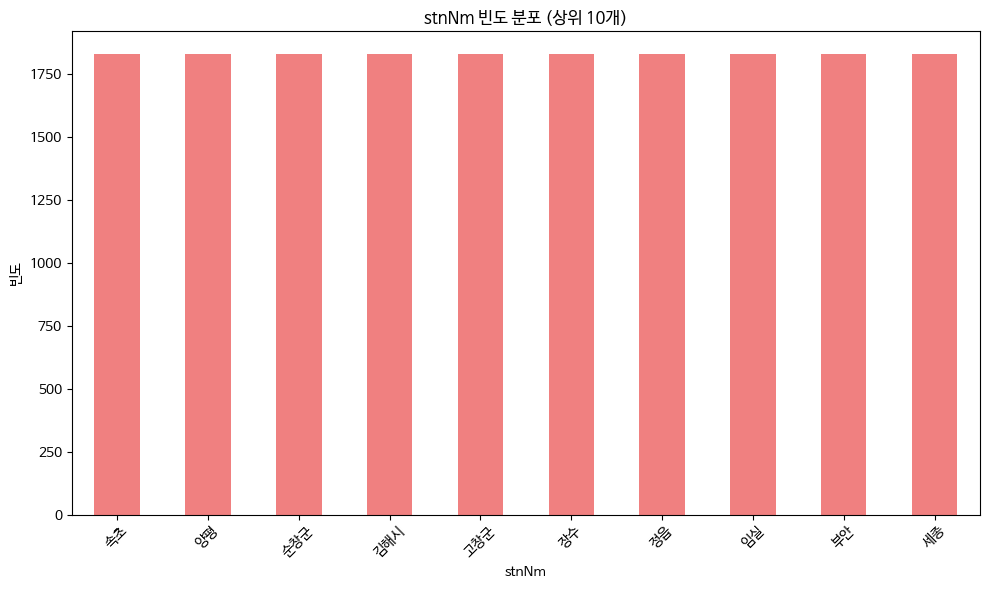

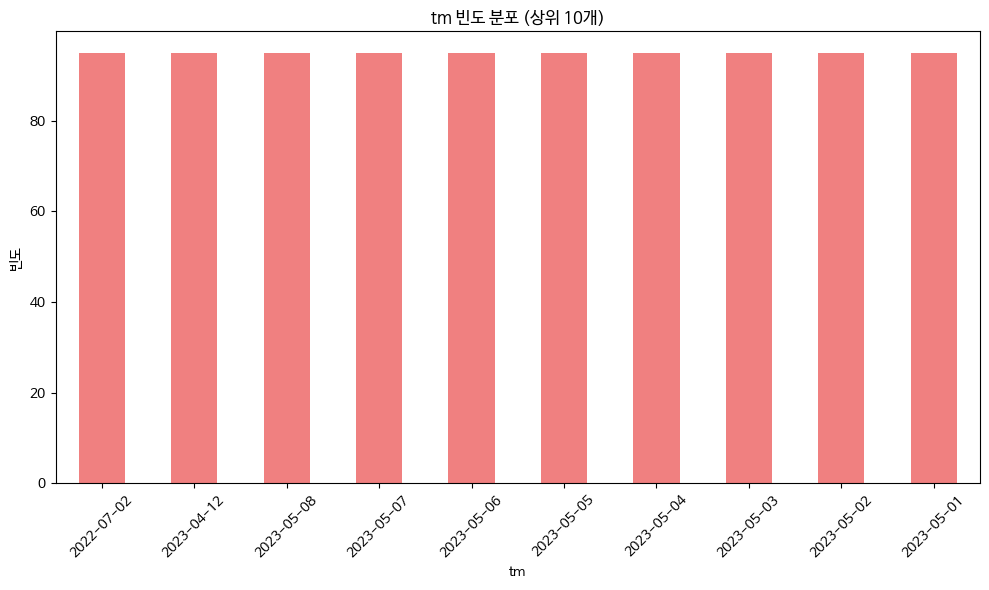

In [20]:
for col in categorical_cols:
    value_counts = df[col].value_counts()
    # 막대그래프 (상위 10개)
    plt.figure(figsize=(10, 6))
    top_10 = value_counts.head(10)
    top_10.plot(kind='bar', color='lightcoral')
    plt.title(f'{col} 빈도 분포 (상위 10개)')
    plt.xlabel(col)
    plt.ylabel('빈도')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 결측치, 이상치 처리 전 변수별 상관관계 확인

상관계수 행렬:
             avgTa     minTa     maxTa     avgTs     avgPs     sumRn  \
avgTa     1.000000  0.977635  0.973247  0.975474 -0.784785  0.209242   
minTa     0.977635  1.000000  0.912376  0.945619 -0.787283  0.241357   
maxTa     0.973247  0.912376  1.000000  0.961031 -0.736713  0.158767   
avgTs     0.975474  0.945619  0.961031  1.000000 -0.774973  0.171362   
avgPs    -0.784785 -0.787283 -0.736713 -0.774973  1.000000 -0.290433   
sumRn     0.209242  0.241357  0.158767  0.171362 -0.290433  1.000000   
hr1MaxRn  0.171662  0.216908  0.100057  0.095024 -0.231668  0.842234   
avgRhm    0.435813  0.502778  0.357847  0.401247 -0.422384  0.375600   
avgPv     0.914641  0.935853  0.852800  0.888165 -0.760013  0.281890   
avgWs    -0.076829 -0.014465 -0.157048 -0.091465 -0.027881  0.029812   
ddMefs   -0.085088 -0.001133 -0.108263 -0.009758 -0.184885  0.652487   
ddMes     0.104687  0.161219  0.020769  0.072903 -0.137257  0.324903   
avgTca    0.292932  0.381726  0.174304  0.235364 -0.343

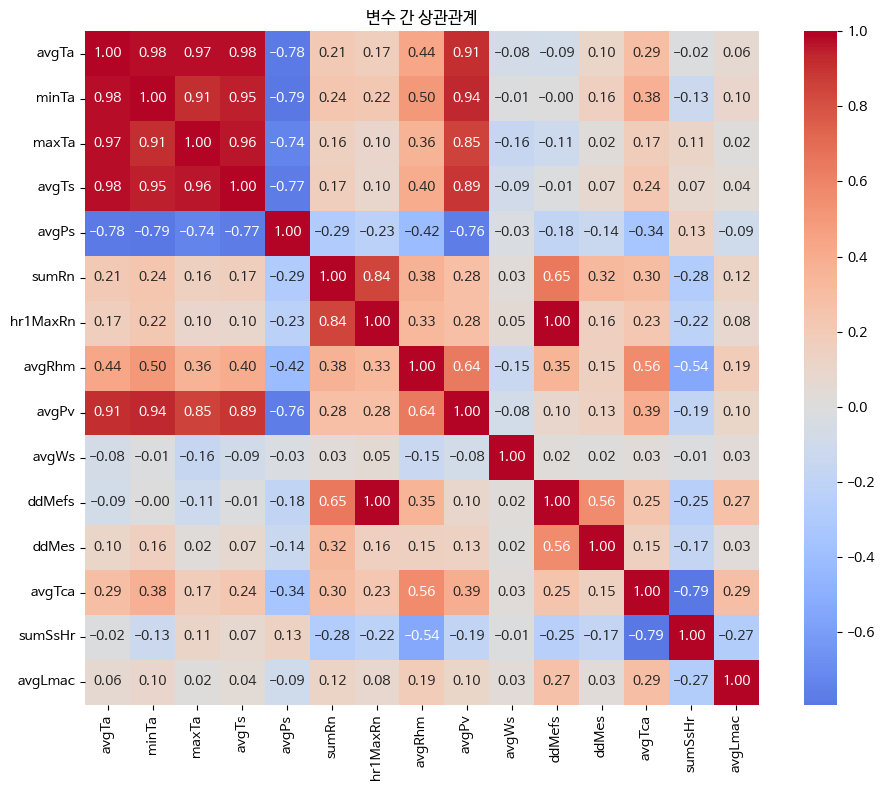

In [21]:
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    
    # 상관계수 출력
    print("상관계수 행렬:")
    print(correlation_matrix)
    print()
    
    # 상관계수 히트맵
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
               square=True, fmt='.2f')
    plt.title('변수 간 상관관계')
    plt.tight_layout()
    plt.show()

In [22]:
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
        
    # 높은 상관관계를 가진 변수 쌍 찾기
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.6 and correlation_matrix.columns[i] != correlation_matrix.columns[j]:  # 상관계수 절댓값이 0.6 이상
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))
    if high_corr_pairs:
        print("높은 상관관계를 가진 변수 쌍 (|r| > 0.7):")
        for var1, var2, corr in high_corr_pairs:
            print(f"  {var1} - {var2}: {corr:.3f}")
    else:
        print("높은 상관관계를 가진 변수 쌍이 없습니다.")   
    

높은 상관관계를 가진 변수 쌍 (|r| > 0.7):
  avgTa - minTa: 0.978
  avgTa - maxTa: 0.973
  avgTa - avgTs: 0.975
  avgTa - avgPs: -0.785
  avgTa - avgPv: 0.915
  minTa - maxTa: 0.912
  minTa - avgTs: 0.946
  minTa - avgPs: -0.787
  minTa - avgPv: 0.936
  maxTa - avgTs: 0.961
  maxTa - avgPs: -0.737
  maxTa - avgPv: 0.853
  avgTs - avgPs: -0.775
  avgTs - avgPv: 0.888
  avgPs - avgPv: -0.760
  sumRn - hr1MaxRn: 0.842
  sumRn - ddMefs: 0.652
  hr1MaxRn - ddMefs: 1.000
  avgRhm - avgPv: 0.639
  avgTca - sumSsHr: -0.794


### 결측치 처리

##### 1. **매우 높은 결측치 (90% 이상) - 제거 권장**
- `ddMefs` (99.3%), `ddMes` (98.9%)  🚫 **눈과 관련된 칼럼들: 눈 분석을 빼자!**
- → **컬럼 삭제** 추천 (거의 모든 값이 없음)

##### 2. **높은 결측치 (50-90%) - 신중한 처리**
- `hr1MaxRn` (74.8%), `sumRn` (61.3%)
- → 강수 관련 변수들이므로 **0으로 대체** 가능 (비가 안 온 날)
- → 또는 **별도 결측 표시 변수** 생성

##### 3. **중간 결측치 (1-10%)**
* `avgTa`, `minTa`, `maxTa`, `avgTs`, `avgPs`, `avgRhm`, `avgPv`, `avgWs`, `avgTca`, `sumSsHr`, `avgLmac`

In [23]:
snow_missing_cols = ['ddMefs', 'ddMes']

weather_features_clean = [ col for col in all_weather_features if col not in snow_missing_cols]
print(f"제거 후 변수 개수: {len(weather_features_clean)}개")


제거 후 변수 개수: 15개


In [24]:
rain_missing_cols = ['hr1MaxRn', 'sumRn']
print(f"강수 관련 변수 0으로 대체 (비가 안 온 날):")

for col in rain_missing_cols:
   if col in df.columns:
       before_count = df[col].isnull().sum()
       missing_rate = (before_count / len(df)) * 100
       df[col] = df[col].fillna(0)
       print(f"   • {col}: {before_count:,}개 ({missing_rate:.1f}%) -> 0으로 대체")

강수 관련 변수 0으로 대체 (비가 안 온 날):
   • hr1MaxRn: 126,607개 (74.8%) -> 0으로 대체
   • sumRn: 103,691개 (61.3%) -> 0으로 대체


In [25]:
other_missing_cols = ['avgTa', 'minTa', 'maxTa', 'avgTs', 'avgPs', 'avgRhm', 'avgPv', 'avgWs', 'avgTca', 'sumSsHr', 'avgLmac']
print(f"기상 변수 선형보간 처리:")

for col in other_missing_cols:
    if col in df.columns:
        before_count = df[col].isnull().sum()
        if before_count > 0:
            missing_rate = (before_count / len(df)) * 100
            df[col] = df[col].interpolate(method='linear')
            after_count = df[col].isnull().sum()
            print(f"{col}: {before_count}개 ({missing_rate: .3f}%) -> 선형보간 (남은 결측: {after_count}개) ")


기상 변수 선형보간 처리:
avgTa: 224개 ( 0.132%) -> 선형보간 (남은 결측: 0개) 
minTa: 94개 ( 0.056%) -> 선형보간 (남은 결측: 0개) 
maxTa: 91개 ( 0.054%) -> 선형보간 (남은 결측: 0개) 
avgTs: 309개 ( 0.183%) -> 선형보간 (남은 결측: 0개) 
avgPs: 248개 ( 0.147%) -> 선형보간 (남은 결측: 0개) 
avgRhm: 286개 ( 0.169%) -> 선형보간 (남은 결측: 0개) 
avgPv: 306개 ( 0.181%) -> 선형보간 (남은 결측: 0개) 
avgWs: 301개 ( 0.178%) -> 선형보간 (남은 결측: 0개) 
avgTca: 1512개 ( 0.894%) -> 선형보간 (남은 결측: 0개) 
sumSsHr: 705개 ( 0.417%) -> 선형보간 (남은 결측: 0개) 
avgLmac: 5313개 ( 3.141%) -> 선형보간 (남은 결측: 0개) 


In [26]:
# 처리 후 결측치 확인
print("결측치 처리 결과:")
remaining_missing = df[weather_features_clean].isnull().sum()
total_missing = remaining_missing.sum()

if total_missing > 0:
   print(f"남은 결측치: {total_missing:,}개")
   for col in weather_features_clean:
       if df[col].isnull().sum() > 0:
           count = df[col].isnull().sum()
           percent = (count / len(df)) * 100
           print(f"   • {col}: {count}개 ({percent:.3f}%)")
else:
   print("모든 결측치 처리 완료")

결측치 처리 결과:
모든 결측치 처리 완료


In [27]:
print(f"• 제거: {len(snow_missing_cols)}개 (눈 관련)")
print(f"• 0 대체: {len(rain_missing_cols)}개 (강수량)")  
print(f"• 선형보간: {len(other_missing_cols)}개 (기상요소)")
print(f"• 최종 변수: {len(weather_features_clean)}개")

• 제거: 2개 (눈 관련)
• 0 대체: 2개 (강수량)
• 선형보간: 11개 (기상요소)
• 최종 변수: 15개


## 이상치 파악

In [28]:
if len(numerical_cols) > 0:
    outlier_summary = []
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            '변수': col,
            '이상치 개수': outlier_count,
            '이상치 비율(%)': round(outlier_percent, 2),
            '하한': round(lower_bound, 2),
            '상한': round(upper_bound, 2)
        })
        
        print(f"{col}:")
        print(f"  이상치 개수: {outlier_count}")
        print(f"  이상치 비율: {outlier_percent:.2f}%")
        print(f"  정상 범위: {lower_bound:.2f} ~ {upper_bound:.2f}")
        print()
    
    outlier_df = pd.DataFrame(outlier_summary)
    print("이상치 요약:")
    print(outlier_df)
else:
    print("이상치 분석을 위한 수치형 변수가 없습니다.")
print()


avgTa:
  이상치 개수: 2
  이상치 비율: 0.00%
  정상 범위: -18.15 ~ 46.25

minTa:
  이상치 개수: 0
  이상치 비율: 0.00%
  정상 범위: -25.70 ~ 44.70

maxTa:
  이상치 개수: 8
  이상치 비율: 0.00%
  정상 범위: -11.60 ~ 50.00

avgTs:
  이상치 개수: 0
  이상치 비율: 0.00%
  정상 범위: -21.65 ~ 53.15

avgPs:
  이상치 개수: 29
  이상치 비율: 0.02%
  정상 범위: 990.95 ~ 1041.75

sumRn:
  이상치 개수: 36398
  이상치 비율: 21.52%
  정상 범위: -0.60 ~ 1.00

hr1MaxRn:
  이상치 개수: 33906
  이상치 비율: 20.04%
  정상 범위: 0.00 ~ 0.00

avgRhm:
  이상치 개수: 594
  이상치 비율: 0.35%
  정상 범위: 27.25 ~ 114.85

avgPv:
  이상치 개수: 0
  이상치 비율: 0.00%
  정상 범위: -16.50 ~ 42.70

avgWs:
  이상치 개수: 9129
  이상치 비율: 5.40%
  정상 범위: -0.95 ~ 4.25

ddMefs:
  이상치 개수: 103
  이상치 비율: 0.06%
  정상 범위: -3.75 ~ 7.05

ddMes:
  이상치 개수: 182
  이상치 비율: 0.11%
  정상 범위: -7.38 ~ 14.43

avgTca:
  이상치 개수: 0
  이상치 비율: 0.00%
  정상 범위: -4.70 ~ 15.30

sumSsHr:
  이상치 개수: 0
  이상치 비율: 0.00%
  정상 범위: -7.70 ~ 19.50

avgLmac:
  이상치 개수: 668
  이상치 비율: 0.39%
  정상 범위: -5.35 ~ 11.05

이상치 요약:
          변수  이상치 개수  이상치 비율(%)      하한       상한
0      avgTa       2  

In [29]:
if len(numerical_cols) > 0:
    outlier_exist_summary = []
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100
        
        if outlier_count > 0:
            outlier_exist_summary.append({
                '변수': col,
                '이상치 개수': outlier_count,
                '이상치 비율(%)': round(outlier_percent, 2),
                '하한': round(lower_bound, 2),
                '상한': round(upper_bound, 2)
            })
            
            print(f"{col}:")
            print(f"  이상치 개수: {outlier_count}")
            print(f"  이상치 비율: {outlier_percent:.2f}%")
            print(f"  정상 범위: {lower_bound:.2f} ~ {upper_bound:.2f}")
            print()
    
    outlier_exist_df = pd.DataFrame(outlier_exist_summary)
    print("이상치(있는 칼럼들만) 요약:")
    print(outlier_exist_df)

avgTa:
  이상치 개수: 2
  이상치 비율: 0.00%
  정상 범위: -18.15 ~ 46.25

maxTa:
  이상치 개수: 8
  이상치 비율: 0.00%
  정상 범위: -11.60 ~ 50.00

avgPs:
  이상치 개수: 29
  이상치 비율: 0.02%
  정상 범위: 990.95 ~ 1041.75

sumRn:
  이상치 개수: 36398
  이상치 비율: 21.52%
  정상 범위: -0.60 ~ 1.00

hr1MaxRn:
  이상치 개수: 33906
  이상치 비율: 20.04%
  정상 범위: 0.00 ~ 0.00

avgRhm:
  이상치 개수: 594
  이상치 비율: 0.35%
  정상 범위: 27.25 ~ 114.85

avgWs:
  이상치 개수: 9129
  이상치 비율: 5.40%
  정상 범위: -0.95 ~ 4.25

ddMefs:
  이상치 개수: 103
  이상치 비율: 0.06%
  정상 범위: -3.75 ~ 7.05

ddMes:
  이상치 개수: 182
  이상치 비율: 0.11%
  정상 범위: -7.38 ~ 14.43

avgLmac:
  이상치 개수: 668
  이상치 비율: 0.39%
  정상 범위: -5.35 ~ 11.05

이상치(있는 칼럼들만) 요약:
         변수  이상치 개수  이상치 비율(%)      하한       상한
0     avgTa       2       0.00  -18.15    46.25
1     maxTa       8       0.00  -11.60    50.00
2     avgPs      29       0.02  990.95  1041.75
3     sumRn   36398      21.52   -0.60     1.00
4  hr1MaxRn   33906      20.04    0.00     0.00
5    avgRhm     594       0.35   27.25   114.85
6     avgWs    9129       5